<a href="https://colab.research.google.com/github/hachristina/Project2/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Propose datasets

##Task
Your task for this week is to propose two possible datasets you would like to work with for Project 2.  

For each possible dataset, show the .head() of the dataset and answer the following questions:

1) Source of data

2) Brief description of data

3) What is the target?

4) Is this a classification or regression problem?

5) How many features?

6) How many rows of data.

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

#Dataset 1: Board Games

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Bootcamp/Project 2/bgg_dataset.csv", sep=';')
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [3]:
df.shape

(20343, 14)

1) Source of data
https://www.kaggle.com/andrewmvd/board-games?select=bgg_dataset.csv

Citation
Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

2) Brief description of data
This dataset contains data collected on board games from the BoardGameGeek (BGG) website in February 2021.

3) What is the target?
Board game average rating

4) Is this a classification or regression problem?
Regression

5) How many features?
14

6) How many rows of data.
20343

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
There are null values to address in this dataset

#Part 2-3: Clean and Explore Data

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

##General cleaning

In [4]:
#Rename columns to make them more "Python"
df.rename(columns={"Year Published": "Year_Published", 
                   "Min Players": "Min_Players", 
                   "Max Players": "Max_Players",
                   "Play Time": "Play_Time",
                   "Min Age": "Min_Age",
                   "Users Rated": "Users_Rated",
                   "Rating Average": "Rating_Average",
                   "BGG Rank": "BGG_Rank",
                   "Complexity Average": "Complexity_Average",
                   "Owned Users": "Owned_Users",}, inplace=True)

##Delete unnecessary columns

Decided to keep all the columns

##Delete duplicate rows

In [5]:
#Delete duplicate rows
df.duplicated().any()

False

There are no duplicated rows to delete

##Identify and address missing values

In [6]:
df.isnull().sum()

#There are missing values in ID, Year_Published, Owned_Users, Mechanics, Domains

ID                       16
Name                      0
Year_Published            1
Min_Players               0
Max_Players               0
Play_Time                 0
Min_Age                   0
Users_Rated               0
Rating_Average            0
BGG_Rank                  0
Complexity_Average        0
Owned_Users              23
Mechanics              1598
Domains               10159
dtype: int64

###Null IDs

In [7]:
#Filling in missing values for IDs to keep the corresponding data, which should be unaffected by the Id value
df["ID"].fillna(0, inplace = True)

###Null Year_Published

In [8]:
#Drop row where Year Published contains a null value. Dropping this rows because it's a minor subset of the dataset
df.dropna(subset=['Year_Published'], inplace=True)

###Null Owned_Users

In [9]:
#Find average relationship between Number of Users Rated and Number of Owned Users
average_means = df['Owned_Users'].mean() / df['Users_Rated'].mean()

In [10]:
print(average_means)

1.6747198970562778


In [11]:
#Fill null values by multiplying the Users_Rated by the average_means to estimate the missing Owned_Users value
df.Owned_Users.fillna(df.Users_Rated * average_means, inplace=True)

###Null Mechanics

In [12]:
#Filling in missing values for mechanics with "Undefined" to not lose data
df["Mechanics"].fillna("Undefined", inplace = True)

###Null Domains

In [13]:
#Filling in missing values for Domain with "Undefined" to not lose data
df.loc[pd.isnull(df['Domains'])]
df["Domains"].fillna("Undefined", inplace = True)

###Confirm no null values

In [14]:
df.isnull().sum()

ID                    0
Name                  0
Year_Published        0
Min_Players           0
Max_Players           0
Play_Time             0
Min_Age               0
Users_Rated           0
Rating_Average        0
BGG_Rank              0
Complexity_Average    0
Owned_Users           0
Mechanics             0
Domains               0
dtype: int64

##Identify and correct inconsistencies in data for categorical values

In [15]:
df.dtypes

ID                    float64
Name                   object
Year_Published        float64
Min_Players             int64
Max_Players             int64
Play_Time               int64
Min_Age                 int64
Users_Rated             int64
Rating_Average         object
BGG_Rank                int64
Complexity_Average     object
Owned_Users           float64
Mechanics              object
Domains                object
dtype: object

In [16]:
#Correct inconsistencies in Rating_Average and Complexity_Average by replacing the comma with a period and turning value into a float
df['Rating_Average'] = df['Rating_Average'].str.replace(',','.')
df['Rating_Average'] = df['Rating_Average'].astype(float)

df['Complexity_Average'] = df['Complexity_Average'].str.replace(',','.')
df['Complexity_Average'] = df['Complexity_Average'].astype(float)

In [17]:
#Turn dtype of Year_Published to int
df['Year_Published'] = df['Year_Published'].astype(int)

In [18]:
df.head()

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


##Produce univariate visuals for target and all features & Identify outliers

In [19]:
#look at metrics for numerical values
df.describe()

,ID,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users
count,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000,20342.000000
mean,108136.447498,1984.249877,2.019713,5.672402,91.297070,9.601957,841.010864,6.403233,10172.702979,1.991187,1407.173124
std,98689.435134,214.003181,0.690383,15.231728,545.460492,3.644926,3511.644023,0.935933,5872.915096,0.848924,5037.609442
min,0.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,10990.500000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.250000,1.330000,146.000000
50%,88759.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10172.500000,1.970000,309.000000
75%,192908.250000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.750000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


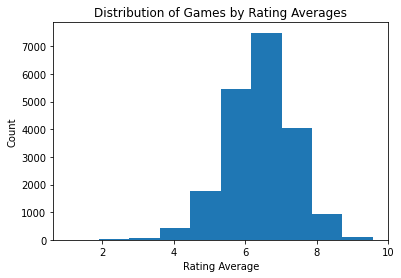

In [20]:
#Univariate visual for target (Rating_Average)
plt.hist(df['Rating_Average'])
plt.xlabel("Rating Average")
plt.ylabel("Count")
plt.title("Distribution of Games by Rating Averages");

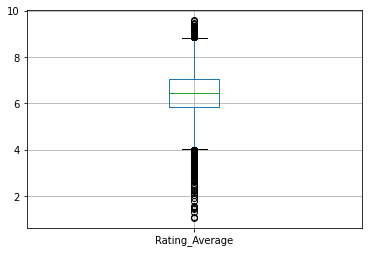

In [21]:
df.boxplot(column = 'Rating_Average');

There are some outliers but they are reasonable and still within the possible rating range

In [22]:
# Create histograms and/or boxplots to visualize univariate distributions of numerical variables

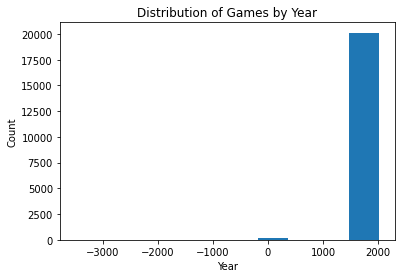

In [23]:
#Visualize distributions of Year_Published
plt.hist(df['Year_Published'])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Games by Year");

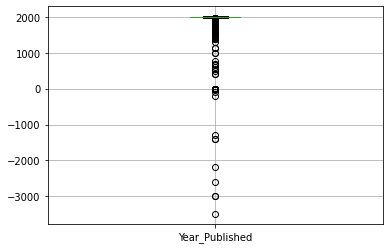

In [24]:
df.boxplot(column = 'Year_Published');

In [25]:
df['Year_Published'].min()

-3500

The vast majority of games were published in the last milenium. There are outliers, with the oldest game dating back to 3500BC. Will still keep the outliers as they are possible.

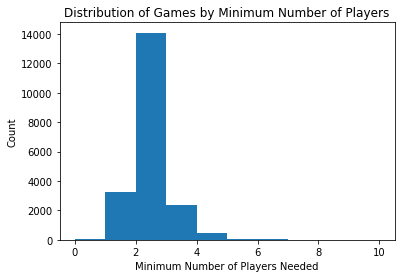

In [26]:
#Visualize distribution of Min_Players
plt.hist(df['Min_Players'])
plt.xlabel("Minimum Number of Players Needed")
plt.ylabel("Count")
plt.title("Distribution of Games by Minimum Number of Players");

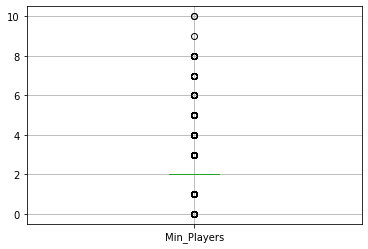

In [27]:
df.boxplot(column = 'Min_Players');

There are outliers looking at the boxplot, but a minimum of 10 players seems possible. However, a minimum of 0 players doesn't seem reasonable as games require at least one player. Will change the rows where min players == 0 to 1

In [28]:
df.loc[df['Min_Players'] == 0, :]

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
2625,37301.0,Decktet,2008,0,0,30,0,494,7.46,2627,2.00,1492.0,Undefined,Family Games
2839,18291.0,Unpublished Prototype,0,0,0,0,0,804,6.90,2841,2.47,1194.0,Undefined,Strategy Games
2988,21804.0,Traditional Card Games,0,0,0,0,0,885,6.61,2990,1.95,1608.0,Undefined,"Abstract Games, Family Games"
3222,99358.0,Stonewall Jackson's Way II: Battles of Bull Run,2013,0,2,720,0,218,8.57,3224,3.74,699.0,"Dice Rolling, Hexagon Grid",Wargames
3587,23953.0,Outside the Scope of BGG,0,0,0,0,0,580,6.68,3589,1.70,2670.0,Undefined,Family Games
4930,5985.0,Miscellaneous Game Accessory,0,0,0,0,0,222,7.16,4932,3.21,1176.0,Undefined,Undefined
5687,2860.0,Piecepack,2001,0,0,10,5,181,7.00,5689,2.40,708.0,Undefined,Abstract Games
5965,144607.0,Bitter Woods: Designer Edition,2014,0,2,480,0,105,7.99,5967,3.00,464.0,"Dice Rolling, Hexagon Grid",Wargames
6209,150012.0,No Retreat!: Polish & French Fronts,2018,0,2,180,14,110,7.69,6211,3.42,576.0,Hexagon Grid,Wargames
6502,10904.0,New Rules for Classic Games,1992,0,0,300,10,94,7.50,6504,2.00,207.0,Undefined,Abstract Games


In [29]:
df.loc[df['Min_Players'] == 0, 'Min_Players'] = 1

In [30]:
df.loc[df['Min_Players'] == 0, :]

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains


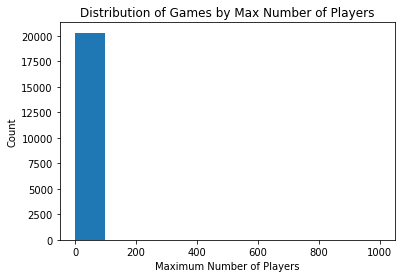

In [31]:
#Visualize distributions of Max_Players
plt.hist(df['Max_Players'])
plt.xlabel("Maximum Number of Players")
plt.ylabel("Count")
plt.title("Distribution of Games by Max Number of Players");

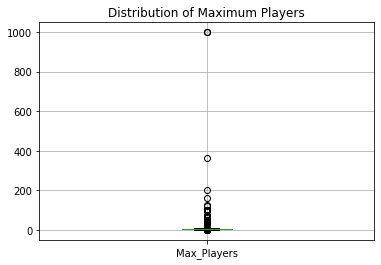

In [32]:
df.boxplot(column = 'Max_Players')
plt.title('Distribution of Maximum Players');

In [33]:
#look at what what the max Max_Players number is
df['Max_Players'].max()

999

In [34]:
#locate which games have this highest number
df.loc[df['Max_Players'] == 999, :]

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
7025,24996.0,Start Player: A Kinda Collectible Card Game,2006,2,999,1,6,178,6.49,7027,1.00,286.0,Undefined,"Family Games, Party Games"
8516,28567.0,"I Don't Know, What Do You Want to Play?",2007,2,999,5,8,87,6.76,8518,1.06,117.0,Voting,Undefined
10813,189890.0,Scrimish Card Game,2015,2,999,100,8,254,5.90,10815,1.13,898.0,Memory,Undefined


999 is a huge outlier. May want to consider turning this feature into categories to include an "unlimited" category

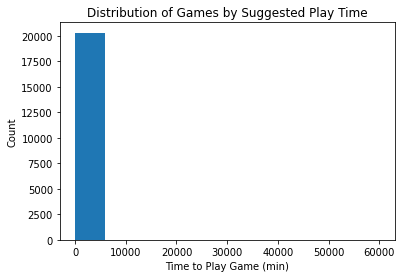

In [35]:
#Visualize distributions of Play_Time
plt.hist(df['Play_Time'])
plt.xlabel("Time to Play Game (min)")
plt.ylabel("Count")
plt.title("Distribution of Games by Suggested Play Time");

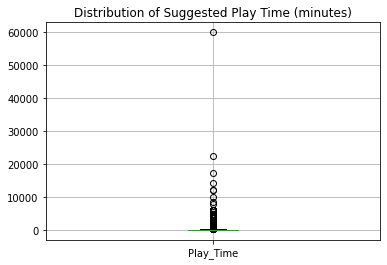

In [36]:
df.boxplot(column = 'Play_Time')
plt.title('Distribution of Suggested Play Time (minutes)');

In [37]:
df['Play_Time'].max()

60000

In [38]:
df.loc[df['Play_Time'] == 60000, :]

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
13420,4815.0,The Campaign for North Africa: The Desert War ...,1979,8,10,60000,14,146,6.1,13422,4.71,385.0,"Dice Rolling, Hexagon Grid, Simulation",Wargames


60000 is a clear outlier.

In [39]:
# Drop the row with the outlier Play_Time
df = df.drop(index = 13420)

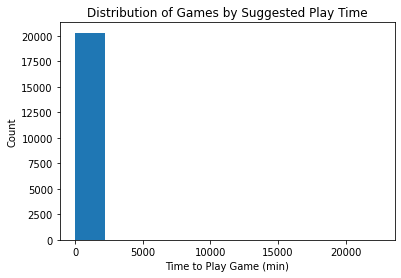

In [40]:
#recreate histogram and boxplot after dropping row
plt.hist(df['Play_Time'])
plt.xlabel("Time to Play Game (min)")
plt.ylabel("Count")
plt.title("Distribution of Games by Suggested Play Time");

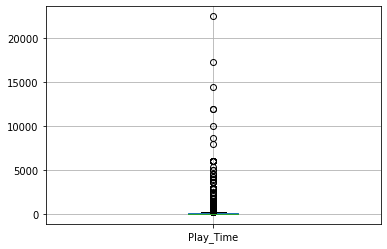

In [41]:
df.boxplot(column = 'Play_Time');

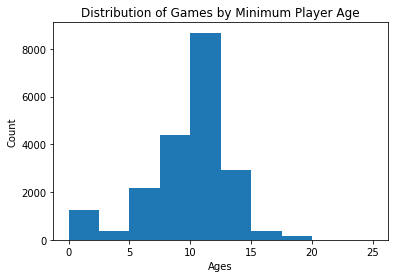

In [42]:
#Visualize distributions of Min_Age
plt.hist(df['Min_Age'])
plt.xlabel("Ages")
plt.ylabel("Count")
plt.title("Distribution of Games by Minimum Player Age");

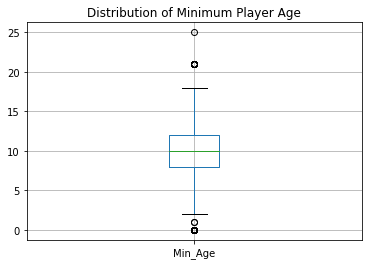

In [43]:
df.boxplot(column = 'Min_Age')
plt.title('Distribution of Minimum Player Age');

There are outliers but they seem reasonable

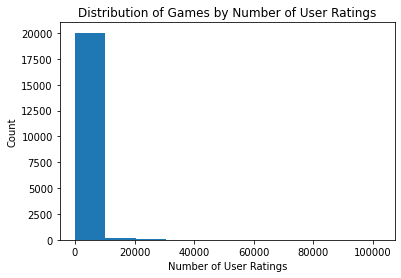

In [44]:
#Visualize distribution of Users_rated
plt.hist(df['Users_Rated'])
plt.xlabel("Number of User Ratings")
plt.ylabel("Count")
plt.title("Distribution of Games by Number of User Ratings");

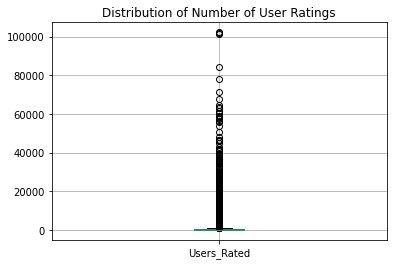

In [45]:
df.boxplot(column = 'Users_Rated')
plt.title('Distribution of Number of User Ratings');

In [46]:
df['Users_Rated'].max()

102214

In [47]:
df.loc[df['Users_Rated'] == 102214, :]

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
98,30549.0,Pandemic,2008,2,4,45,8,102214,7.61,99,2.41,155312.0,"Action Points, Cooperative Game, Hand Manageme...","Family Games, Strategy Games"


For most games, the number of user ratings is between 0-20000. There are clear outliers. But I decided to not remove outliers here as the games with the highest number of ratings is likely to indicate high popularity and likely high ratings, as shown by the largest outlier (game with the highest Users_Rated). These outliers are likely to provide trends in highly rated games.

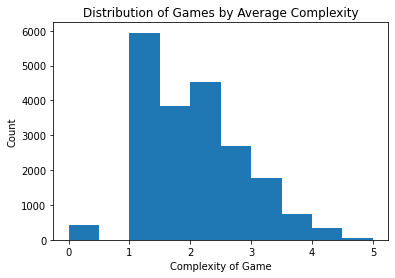

In [48]:
#Visualize distribution of Complexity_Average
plt.hist(df['Complexity_Average'])
plt.xlabel("Complexity of Game")
plt.ylabel("Count")
plt.title("Distribution of Games by Average Complexity");

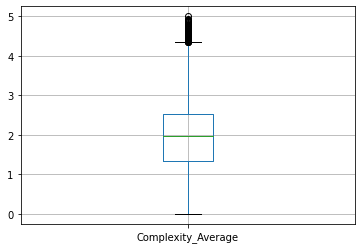

In [49]:
df.boxplot(column = 'Complexity_Average');

There seem to be some outliers but they are still within the possible range

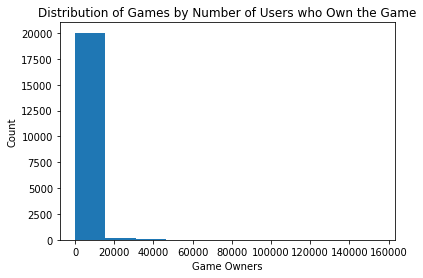

In [50]:
#Visualize distribution of Owned_Users
plt.hist(df['Owned_Users'])
plt.xlabel("Game Owners")
plt.ylabel("Count")
plt.title("Distribution of Games by Number of Users who Own the Game");

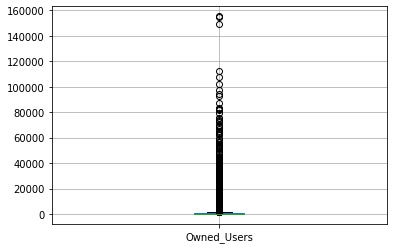

In [51]:
df.boxplot(column = 'Owned_Users');

There are outliers but similar to Users Rated, Owned Users likely indicate popularity and therefore a high rating of games

##Produce a correlation heatmap

Identify any moderate or strong correlations between your target and your features and/or between one feature and another

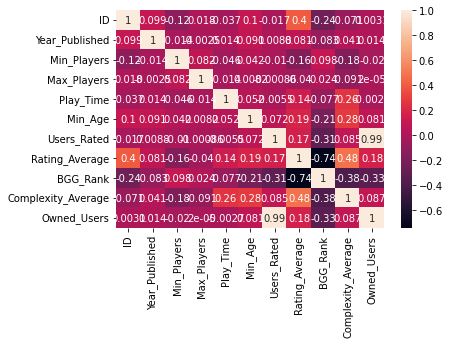

In [52]:
# Explore the relationships between variables with bivariate visuals
corr = df.corr()

sns.heatmap(corr, annot = True);

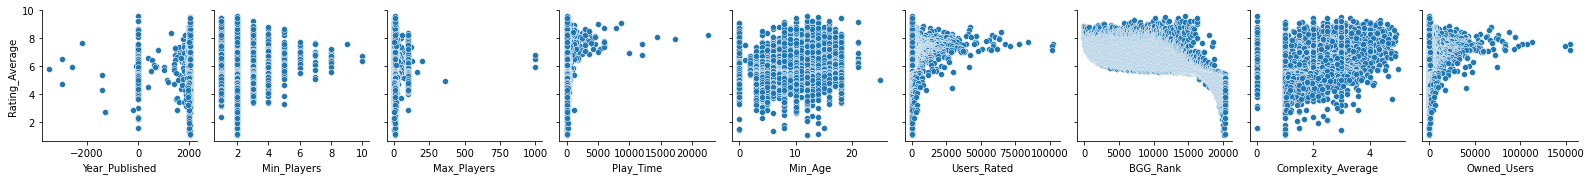

In [53]:
#Scatterplot between of your features and the target 
sns.pairplot(df,
             x_vars = ['Year_Published', 'Min_Players', 'Max_Players', 'Play_Time', 'Min_Age', 'Users_Rated', 'BGG_Rank', 'Complexity_Average', 'Owned_Users'],
             y_vars = ['Rating_Average']);

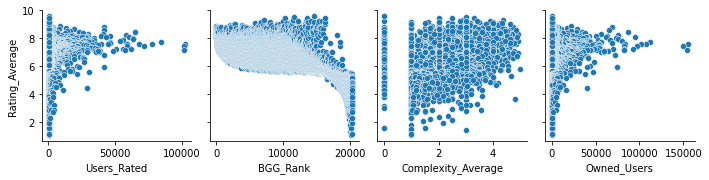

In [54]:
sns.pairplot(df,
             x_vars = ['Users_Rated', 'BGG_Rank', 'Complexity_Average', 'Owned_Users'],
             y_vars = ['Rating_Average']);

##Explore Categorial Variables

##Turn strings in Domains column into lists

In [55]:
df['Domains'].unique()

array(['Strategy Games, Thematic Games', 'Strategy Games',
       'Thematic Games', 'Strategy Games, Wargames',
       'Thematic Games, Wargames', 'Family Games, Strategy Games',
       'Customizable Games, Thematic Games',
       'Abstract Games, Family Games', 'Customizable Games',
       'Family Games', 'Party Games', 'Customizable Games, Wargames',
       'Wargames', 'Party Games, Thematic Games', 'Abstract Games',
       'Customizable Games, Strategy Games',
       'Family Games, Thematic Games', 'Family Games, Party Games',
       'Abstract Games, Strategy Games', "Children's Games, Family Games",
       'Undefined', 'Party Games, Strategy Games', "Children's Games",
       "Children's Games, Party Games",
       'Abstract Games, Customizable Games',
       'Family Games, Strategy Games, Thematic Games',
       'Family Games, Party Games, Thematic Games',
       'Strategy Games, Thematic Games, Wargames',
       'Abstract Games, Party Games', "Abstract Games, Children's Games",
 

In [56]:
#Turn the strings in the Domains column into lists by splitting the strings by commas and strip white space
df['Domains'] = [x.strip(' ').split(',') for x in df['Domains']]

In [57]:
#confirm change by seeing .head() of the dataframe and seeing the square brackets
df.head()

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","[Strategy Games, Thematic Games]"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","[Strategy Games, Thematic Games]"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",[Strategy Games]
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",[Strategy Games]
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","[Strategy Games, Thematic Games]"


In [58]:
#can also confirm change by grabbing the first item in the Domains list in the first row
df['Domains'][0][0]

'Strategy Games'

Value counts of domains

In [59]:
#create function to find value counts of list items
#source: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

def to_1D(series):
 return pd.Series([x.strip() for _list in series for x in _list])

In [60]:
#find value counts of types of Domains
to_1D(df['Domains']).value_counts()

Undefined             10158
Wargames               3315
Strategy Games         2205
Family Games           2173
Thematic Games         1174
Abstract Games         1070
Children's Games        849
Party Games             605
Customizable Games      297
dtype: int64

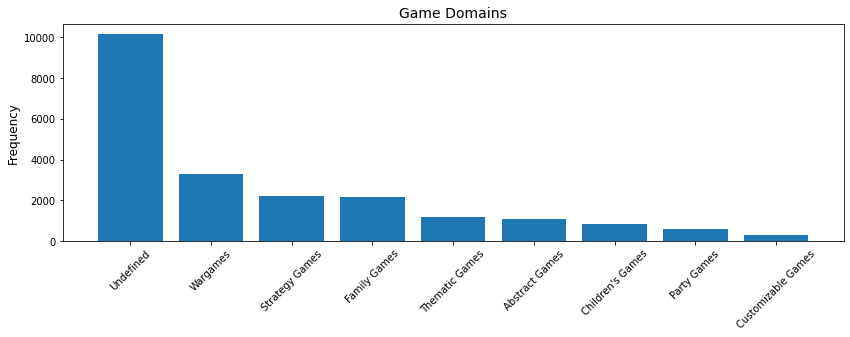

In [61]:
#visualize types of domains

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df['Domains']).value_counts().index,
        to_1D(df['Domains']).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Game Domains", size = 14)
plt.xticks(rotation = 45);

##Turn strings in Mechanics column into lists

In [62]:
#Turn the strings in the Mechanics column into lists by splitting the strings by commas and strip white space
df['Mechanics'] = [x.strip(' ').split(',') for x in df['Mechanics']]

In [63]:
#confirm change by grabbing the first item in the Domains list in the first row
df['Mechanics'][0][0]

'Action Queue'

In [64]:
#create function to find value counts of list items
#source: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

def to_1D(series):
 return pd.Series([x.strip() for _list in series for x in _list])

In [65]:
#find value counts of types of Mechanics
to_1D(df['Mechanics']).value_counts()

Dice Rolling               5671
Hand Management            4152
Set Collection             2733
Variable Player Powers     2534
Hexagon Grid               2252
                           ... 
Passed Action Token           4
Auction: Dexterity            3
Auction: Dutch Priority       3
Selection Order Bid           3
Auction: English              1
Length: 183, dtype: int64

In [66]:
#create a dataframe containing the top 20 most common game mechanics
top_mechanics_df = to_1D(df['Mechanics']).value_counts().rename_axis('unique_values').reset_index(name='counts')[:20]

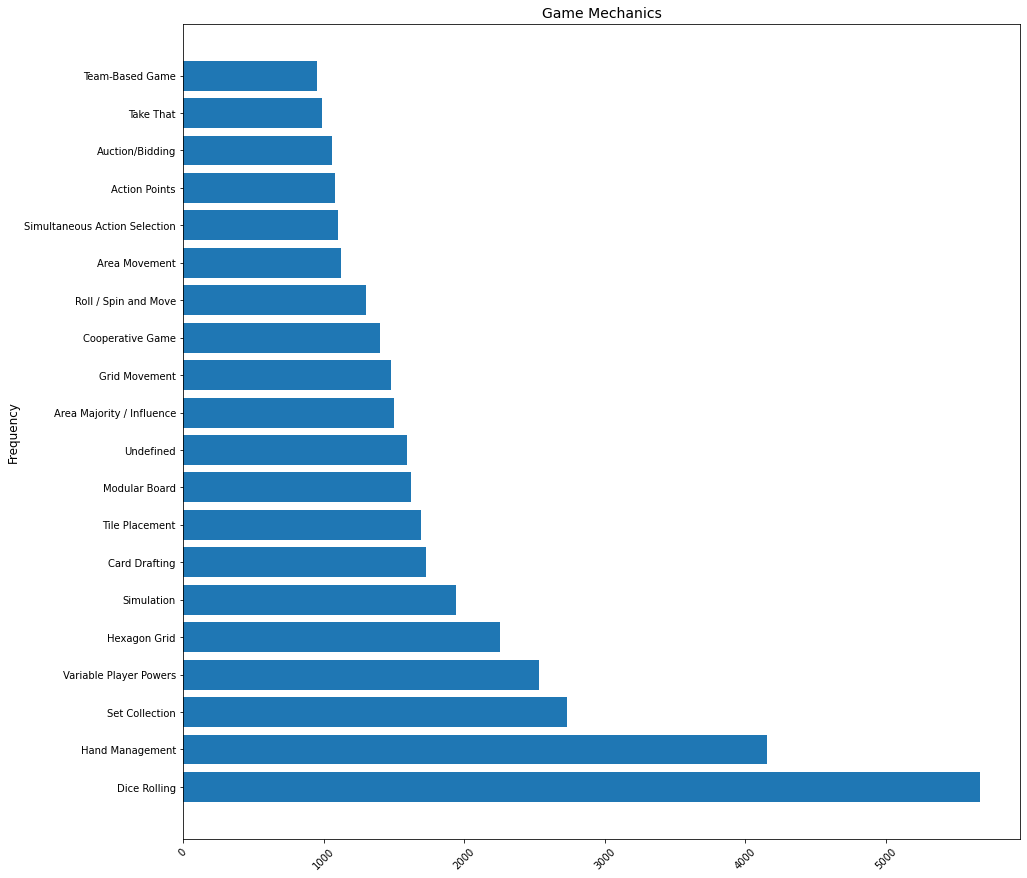

In [67]:
#visualize top 20 most common game mechanics
fig, ax = plt.subplots(figsize = (15,15))
ax.barh(top_mechanics_df['unique_values'],
        top_mechanics_df['counts'])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Game Mechanics", size = 14)
plt.xticks(rotation = 45);

Dice Rolling and Hand Management are the top 2 most common type of game mechanic

##Expanding Domain and Mechanics columns

I found this ability to expand a data frame that contains lists. I likely won't use this expanded df in case it skews the data, but I thought it was an interesting way to manipulate the dataframe and could be useful depending on the question being asked. 

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

In [68]:
#expanding first by Domains
expanded_df = df.explode('Domains')

In [69]:
#then expand by Mechanics and view with .head()
expanded_df = expanded_df.explode('Mechanics')
expanded_df.head()

,ID,Name,Year_Published,Min_Players,Max_Players,Play_Time,Min_Age,Users_Rated,Rating_Average,BGG_Rank,Complexity_Average,Owned_Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,Action Queue,Strategy Games
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,Action Retrieval,Strategy Games
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,Campaign / Battle Card Driven,Strategy Games
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,Card Play Conflict Resolution,Strategy Games
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323.0,Communication Limits,Strategy Games


##Saving for Next Preprocessing Steps

Saving for future assignments. To perform predictions, I will start with the following source to use OHE for the lists in my dataframe

https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list